#Prediction and Classification of Cardio Vascular Disease using Machine Learning


Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain (angina) or stroke. Other heart conditions, such as those that affect your heart’s muscle, valves or rhythm, also are considered forms of heart disease.

Cardiovascular diseases are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Early detection, and managment of cardiovascular diseases can be a great way to manage the fatality rate associated with cardiovascular diseases, and this is where a machine learning model comes in.

### We will use the following steps to predict the Heart Disease 

- Understanding the Problem 
- Reading and understanding the data
- Exploratory Data Analysis and visualisation
- Modeling
- Generate Insight

### Objective 

In this notebook we are going to perfrom some analysis to discover differnt insights about the Heart disease and develop different ML models(SVM,Logistic Regression,Decision Tree,Random Forest) to predict the chances of Heart Disease based on some relevant features.

### Dataset 

The dataset is taken from kaggle.
Source of the dataset - [Heart Disease Prediction](https://www.kaggle.com/cherngs/heart-disease-cleveland-uci)

There are 14 features in the dataset, which are described below.

- age: age in years
- sex: sex (1 = male; 0 = female)
- cp: chest pain type
  - Value 0: typical angina
  - Value 1: atypical angina
  - Value 2: non-anginal pain
  - Value 3: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  -  Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
  - Value 0: upsloping
  - Value 1: flat
  - Value 2: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: Thalessemia
  - 0 = normal
  - 1 = fixed defect 
  - 2 = reversable defect
- condition: 0 = no disease, 1 = disease

## Importing all the required libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [ ]:
heart = pd.read_csv("heart_cleveland_upload.csv")
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


## Exploring the dataset

In [ ]:
# using info() method to get the concise summary of the dataframe.
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None


*In above summary We can see that there are total 297 rows and 14 columns present in the dataset. the summary also includes list of all columns with their data types and the number of non-null values in each column. we also have the value of rangeindex provided for the index axis.*

In [ ]:
# creating a copy of dataset so that will not affect our original dataset.
heart_df = heart.copy()

In [ ]:
# Renaming the column 
heart_df = heart_df.rename(columns={'condition':'target'})
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## Checking null values 

In [ ]:
# check if there is any Null value using isnull() method
heart_df.isnull().values.any()

False

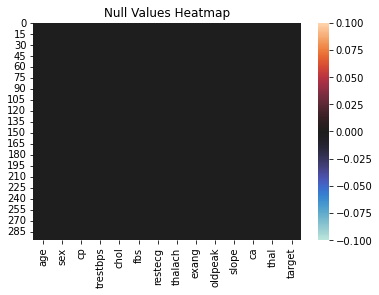

In [ ]:
## this is the visual representation of null values present in data
sns.heatmap(heart_df.isnull(),cmap="icefire")
plt.title('Null Values Heatmap')
plt.show()

*Fortunately, there is no missing values present in the dataset.*

In [ ]:
# find unique values in dataset using nunique() method. it exclude NA values by default.
heart_df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        2
dtype: int64

## Exploratory Data analysis and visualisation

### Distribution of target variable

In [ ]:
heart_df['target'].value_counts()

0    160
1    137
Name: target, dtype: int64

In [ ]:
# Percentage of patients have and do not have heart disease
heart_df['target'].value_counts()/heart_df.shape[0]*100

0    53.872054
1    46.127946
Name: target, dtype: float64

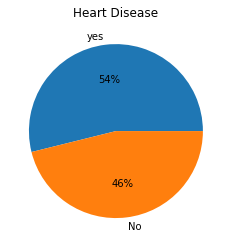

In [ ]:
# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['yes', 'No']
values = heart_df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

*As 54% of the person have heart attack so data is almost balanced so no need to balance the data.*


### Distribution of features 

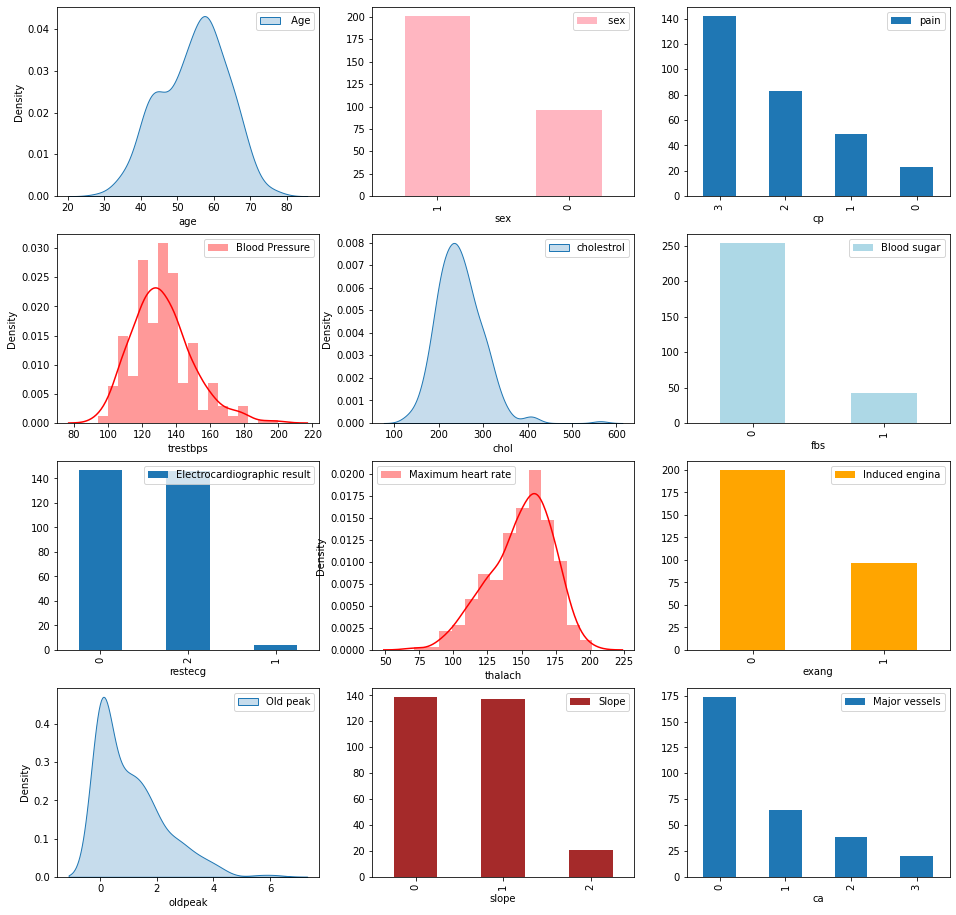

In [ ]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(431)
sns.kdeplot(heart_df['age'],shade=True,label=' Age')
# plt.title ('Distribution of Age')
plt.legend()
fig = plt.subplot(432)
heart_df['sex'].value_counts().plot(kind='bar',label=' sex', color="lightpink")
plt.xlabel('sex')
# plt.title ('Distribution of sex')
plt.legend()
fig = plt.subplot(433)
heart_df['cp'].value_counts().plot(kind='bar',label='pain')
plt.xlabel('cp')
# plt.title ('Distribution of chest pain')
plt.legend()
fig = plt.subplot(434)
# sns.kdeplot(data['trtbps'],shade=True,label='blood pressure')
sns.distplot(heart_df['trestbps'], color="red",  kde= True,label='Blood Pressure')
# plt.title ('Distribution of blood pressure')
plt.legend()
fig = plt.subplot(435)
sns.kdeplot(heart_df['chol'],shade=True,label='cholestrol')
# plt.title ('Distribution of cholestrol')
plt.legend()
fig = plt.subplot(436)
heart_df['fbs'].value_counts().plot(kind='bar',label='Blood sugar', color="lightblue")
plt.xlabel('fbs')
# plt.title ('Distribution of blood sugar')
plt.legend()
fig = plt.subplot(437)
heart_df['restecg'].value_counts().plot(kind='bar',label='Electrocardiographic result')
plt.xlabel('restecg')
# plt.title ('Distribution of electrocardiographic result')
plt.legend()
fig = plt.subplot(438)
# sns.kdeplot(data['thalachh'],shade=True,label='Maximum heart rate')
sns.distplot(heart_df['thalach'], color="red",  kde= True,label='Maximum heart rate')
# plt.title ('Distribution of maximum heart rate')
plt.legend()
fig = plt.subplot(439)
heart_df['exang'].value_counts().plot(kind='bar',label='Induced engina', color="orange")
plt.xlabel('exang')
# plt.title ('Distribution of induced engina')
plt.legend()
fig = plt.subplot(4,3,10)
sns.kdeplot(heart_df['oldpeak'],shade=True,label='Old peak')
plt.xlabel('oldpeak')
# plt.title ('Distribution of old peak')
plt.legend()
fig = plt.subplot(4,3,11)
heart_df['slope'].value_counts().plot(kind='bar',label='Slope', color="brown")
plt.xlabel('slope')
# plt.title ('Distribution of slope')
plt.legend()
fig = plt.subplot(4,3,12)
heart_df['ca'].value_counts().plot(kind='bar',label='Major vessels')
plt.xlabel('ca')
# plt.title ('Distribution of no. of major vessels')
plt.legend()
plt.show()

*Most of the people have age between 50-60, are male, have less chest pain, blood pressure between 120 to 140, cholestrol between 200-300, blood sugar less than 120 and heart rate between 150-175.*

## Distribution of features w.r.t target

### Age distribution based on heart disease

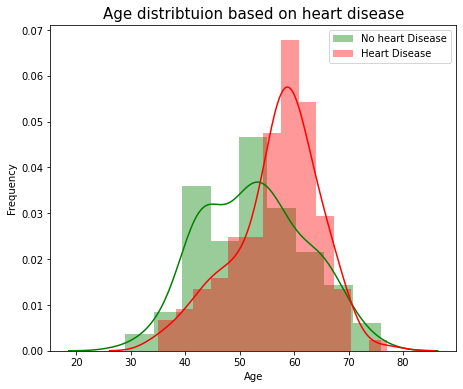

In [ ]:
fig=plt.figure(figsize=(16,6))
fig = plt.subplot(121)
sns.distplot(heart_df[heart_df['target'] == 0]["age"], color='green',label='No heart Disease') 
sns.distplot(heart_df[heart_df['target'] == 1]["age"], color='red',label='Heart Disease') #Red for heart disease
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age distribtuion based on heart disease', fontsize=15)
plt.legend()
plt.show()


In [ ]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['age']))
print('Max age of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['age']))
print('Average age of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['age'].mean())

Min age of people who do not have heart disease:  29
Max age of people who do not have heart disease:  76
Average age of people who do not have heart disease:  52.64375


In [ ]:
# Get min, max and average of the age of the people have heart diseas
print('Min age of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['age']))
print('Max age of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['age']))
print('Average age of people who have heart disease: ', heart_df[heart_df['target'] == 1]['age'].mean())

Min age of people who have heart disease:  35
Max age of people who have heart disease:  77
Average age of people who have heart disease:  56.75912408759124


*From above plot we can infer that People having age 40-75 are more likely to have heart disease.* 

### Heart disease frequency according to chest pain types

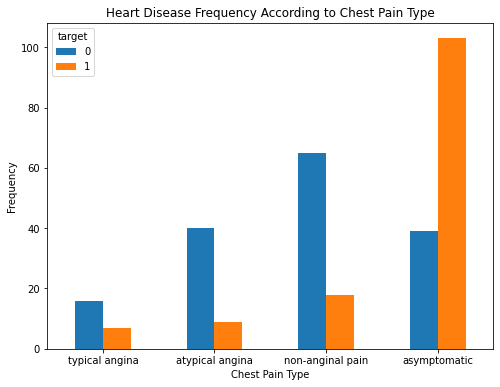

In [ ]:
pd.crosstab(heart_df.cp,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

*We can see that most of the people with the heart disease have **asymptomatic** chest pain.* 

### Blood pressure distribution based on heart rate

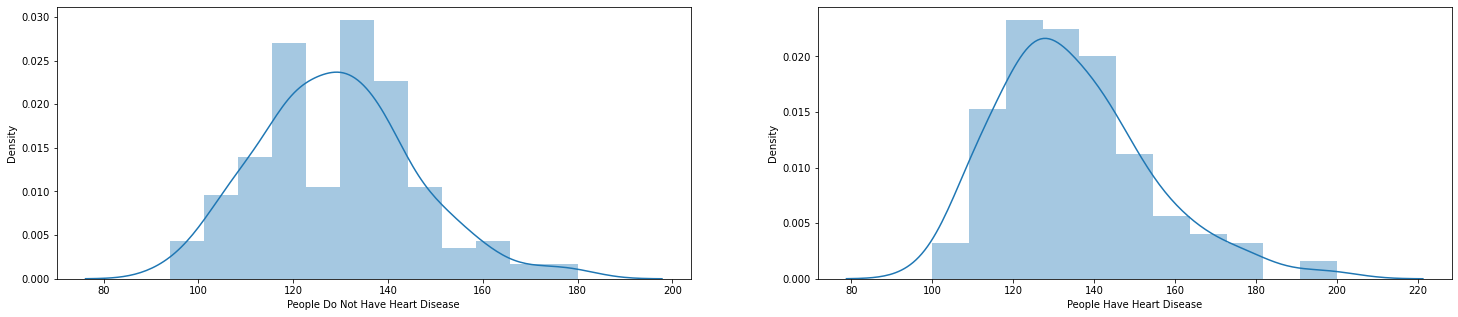

In [ ]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['trestbps'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['trestbps'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [ ]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['trestbps'].mean())

Min blood pressure of people who do not have heart disease:  94
Max blood pressure of people who do not have heart disease:  180
Average blood pressure of people who do not have heart disease:  129.175


In [ ]:
# Get min, max and average of the blood pressure of the people have heart diseas
print('Min blood pressure of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['trestbps']))
print('Average blood pressure of people who have heart disease: ', heart_df[heart_df['target'] == 1]['trestbps'].mean())

Min blood pressure of people who have heart disease:  100
Max blood pressure of people who have heart disease:  200
Average blood pressure of people who have heart disease:  134.63503649635035


*People having blood pressure between **110 to 140** are more likely to have a heart attack*

### Cholesterol distribution based on heart disease

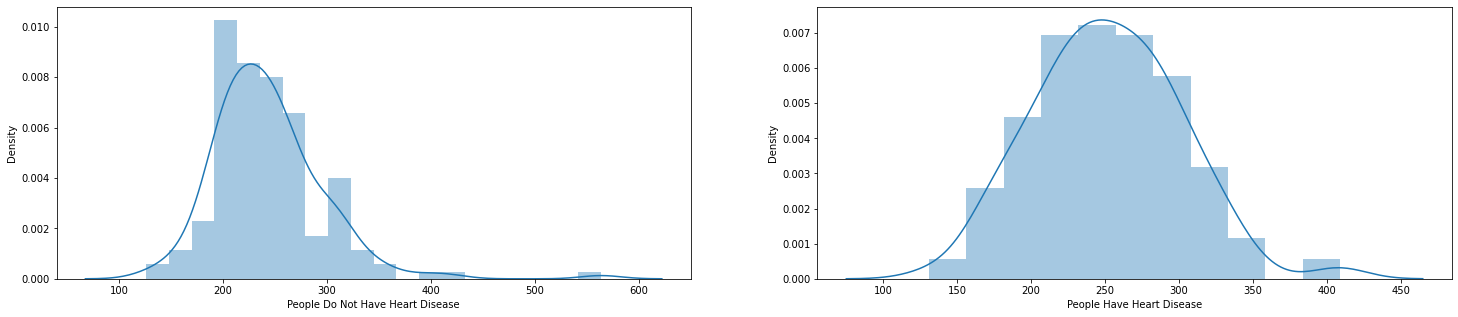

In [ ]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['chol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['chol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [ ]:
# Get min, max and average of the Cholestoral of the people do not have heart diseas
print('Min cholestoral of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['chol']))
print('Max cholestoral of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['chol']))
print('Average cholestoral of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['chol'].mean())

Min cholestoral of people who do not have heart disease:  126
Max cholestoral of people who do not have heart disease:  564
Average cholestoral of people who do not have heart disease:  243.49375


In [ ]:
# Get min, max and average of the Cholestoral of the people have heart diseas
print('Min cholestoral of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['chol']))
print('Max cholestoral of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['chol']))
print('Average cholestorale of people who have heart disease: ', heart_df[heart_df['target'] == 1]['chol'].mean())

Min cholestoral of people who have heart disease:  131
Max cholestoral of people who have heart disease:  409
Average cholestorale of people who have heart disease:  251.85401459854015


### Heart Disease Frequency According to Fasting Blood Sugar

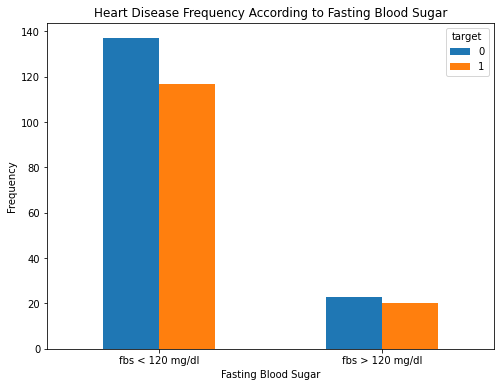

In [ ]:
pd.crosstab(heart_df.fbs,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

### Heart Disease Frequency According to Resting Electrocardiographic Results

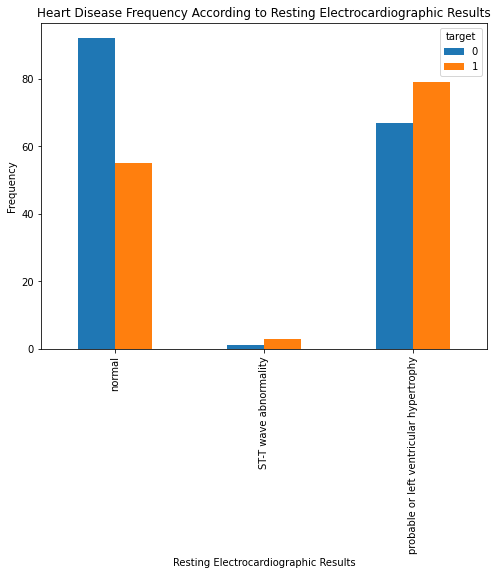

In [ ]:
pd.crosstab(heart_df.restecg,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()


*Usually the people who do not have heart disease have normal electrocardiographic, whereas the people who have heart disease have probable or left ventricular hypertrophy.*

### Maximum heart rate distribution based on heart disease

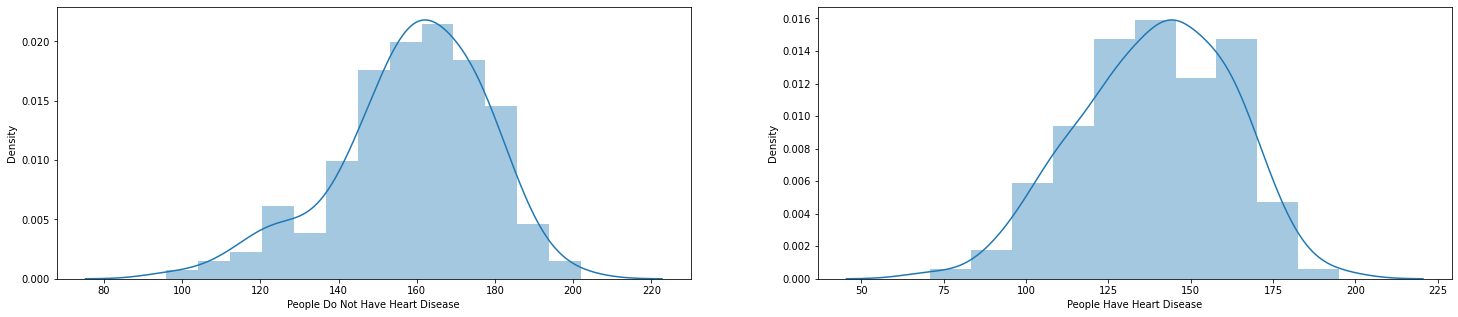

In [ ]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['thalach'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['thalach'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

*The people who have high heart rate **greater than 150** are more likely to have heart disease.*

### ST depression distribution based on heart disease

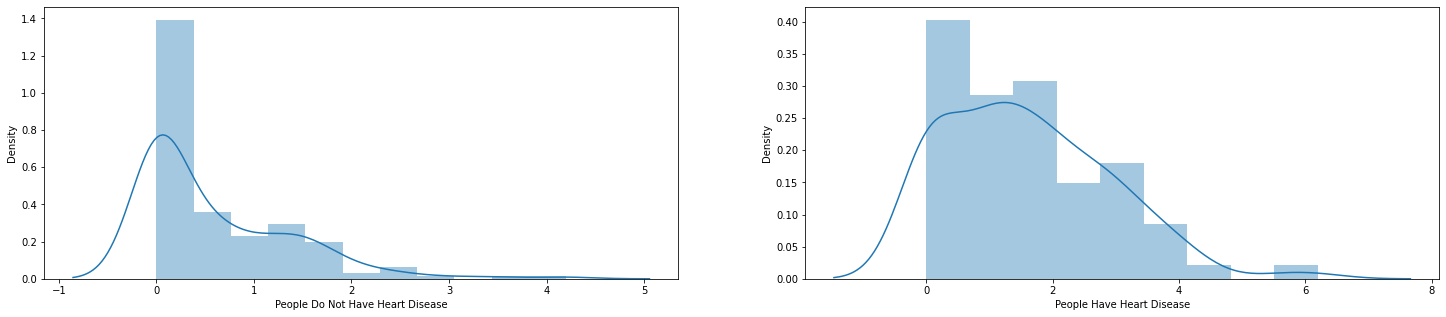

In [ ]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['oldpeak'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['oldpeak'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [ ]:
# Get min, max and average of the ST depression  of the people have heart diseas
print('Min ST depression of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['oldpeak']))
print('Max ST depression of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['oldpeak']))
print('Average ST depression of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['oldpeak'].mean())

Min ST depression of people who do not have heart disease:  0.0
Max ST depression of people who do not have heart disease:  4.2
Average ST depression of people who do not have heart disease:  0.5987500000000001


In [ ]:
# Get min, max and average of the ST depression of the people have heart diseas
print('Min ST depression of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['oldpeak']))
print('Max ST depression of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['oldpeak']))
print('Average ST depression of people not have heart disease: ', heart_df[heart_df['target'] == 1]['oldpeak'].mean())

Min ST depression of people who have heart disease:  0.0
Max ST depression of people who have heart disease:  6.2
Average ST depression of people not have heart disease:  1.5890510948905108


*The average ST depression of people who do not have heart disease is 0.6 and the average ST depression of people have heart disease is 1.5.*

### Heart Disease Frequency According to Exercise Induced Angina

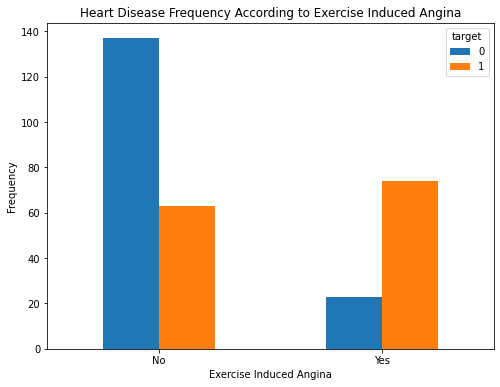

In [ ]:
pd.crosstab(heart_df.exang,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

*The people who suffer from exercise induced angina are more likely to likely to be infected with the heart disease.*

### Slope of the peak exercise ST segment based on the target

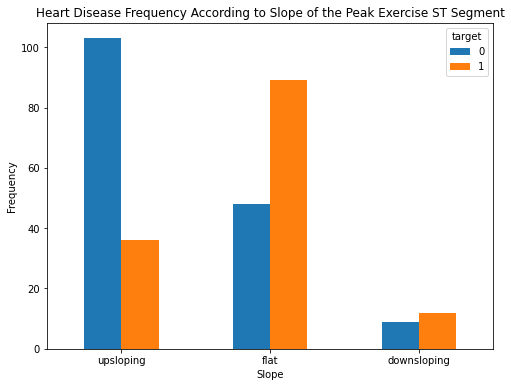

In [ ]:
pd.crosstab(heart_df.slope,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

*As we can see that,the people with flat peak ST segment are likely to have heart disease and usually the people who do not have heart disease have upsloping peak ST segment.*

### Number of vessels based on the target

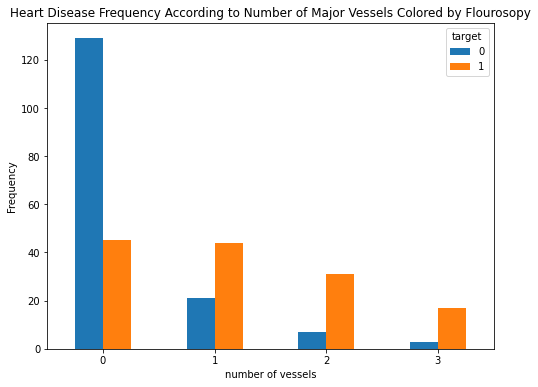

In [ ]:
pd.crosstab(heart_df.ca,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

*People who do not have heart disease usually do not have major vessels colored by flourosopy*

### Heart Disease Frequency According to Thalassemia

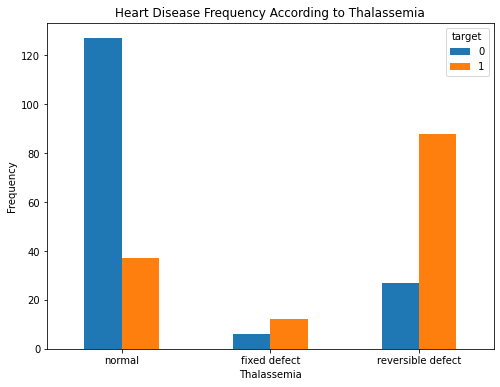

In [ ]:
pd.crosstab(heart_df.thal,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

*People with reversible defect are more likely to have heart disease.*

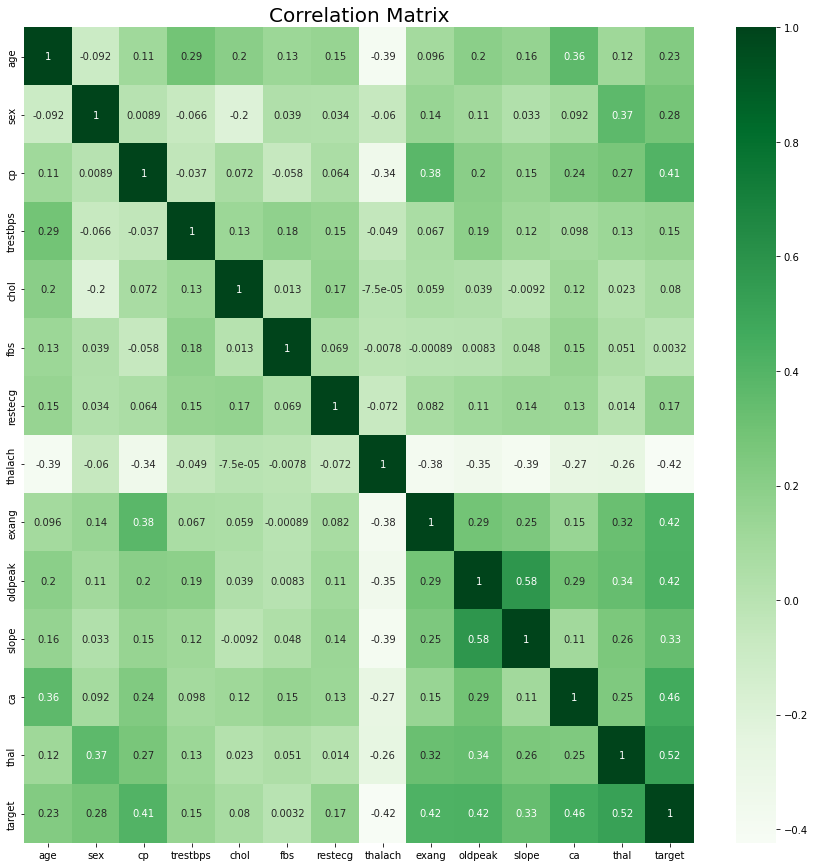

In [ ]:
# Correlation map
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix', size=20)
sns.heatmap(heart_df.corr(), annot = True, cmap = "Greens")
plt.show()

From the above correlation plot, the chest pain type (cp), exercise induced angina (exang), ST depression induced by exercise relative to rest (oldpeak), the slope of the peak exercise ST segment (slope), number of major vessels (0-3) colored by flourosopy (ca) and thalassemia (thal) are correlated with the heart disease (target) directly. We see also that there is an inverse proportion between the heart disease and maximum heart rate (thalch).

We can see also, there are a relation between the following attributes:

- The number of major vessels (0-3) colored by flourosopy (ca) and the age.
- ST depression induced by exercise relative to rest (oldpeak) and the slope of the peak exercise ST segment (slope).
- The chest pain type (cp), exercise induced angina (exang).
- maximum heart rate (thalch) and the age.


### Model building and traning 

In [ ]:

#fixing our data in x and y. Here y contains target data and X contains rest all the features.
x= heart_df.drop(columns= 'target')
y= heart_df.target

# splitting our dataset into training and testing for this we will use train_test_split library.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)
print('X_train size: {}, X_test size: {}'.format(x_train.shape, x_test.shape))

X_train size: (222, 13), X_test size: (75, 13)


Here I have kept **25% for testing** and the rest **75% is for training** the model.

In [ ]:
#feature scaling
scaler= StandardScaler()
x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler= scaler.fit_transform(x_test)


### Logistic Regression Model 

In [ ]:
# creating Logistic Regression Model
LR_model= LogisticRegression()
LR_model.fit(x_train_scaler, y_train)
y_pred_LR= LR_model.predict(x_test_scaler)
LR_model.score(x_test_scaler,y_test)

0.76

In [ ]:
print('Classification Report\n', classification_report(y_test, y_pred_LR))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_LR)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.79      0.77        38
           1       0.77      0.73      0.75        37

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.76      0.76      0.76        75

Accuracy: 76.0%



In [ ]:
cm = confusion_matrix(y_test, y_pred_LR)
cm

array([[30,  8],
       [10, 27]])

### K-nearest-neighbor classifier 

In [ ]:
# creating Knn Model
Knn_model= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
Knn_model.fit(x_train_scaler, y_train)
y_pred_knn= Knn_model.predict(x_test_scaler)
Knn_model.score(x_test_scaler,y_test)

0.7466666666666667

In [ ]:
print('Classification Report\n', classification_report(y_test, y_pred_knn))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_knn)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.75      0.73      0.74        37

    accuracy                           0.75        75
   macro avg       0.75      0.75      0.75        75
weighted avg       0.75      0.75      0.75        75

Accuracy: 74.67%



In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[29,  9],
       [10, 27]])

### Support Vector Classifier

In [ ]:
SVC_model= SVC()
SVC_model.fit(x_train_scaler, y_train)
y_pred_SVC= SVC_model.predict(x_test_scaler)
SVC_model.score(x_test_scaler,y_test)

0.7866666666666666

In [ ]:
print('Classification Report\n', classification_report(y_test, y_pred_SVC))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_SVC)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        38
           1       0.78      0.78      0.78        37

    accuracy                           0.79        75
   macro avg       0.79      0.79      0.79        75
weighted avg       0.79      0.79      0.79        75

Accuracy: 78.67%



In [ ]:
cm = confusion_matrix(y_test, y_pred_SVC)
cm

array([[30,  8],
       [ 8, 29]])

### Random Forest Classifier

In [ ]:
RF_model= RandomForestClassifier(n_estimators=20)
RF_model.fit(x_train_scaler, y_train)
y_pred_RF= RF_model.predict(x_test_scaler)
RF_model.score(x_test_scaler,y_test)

0.7733333333333333

In [ ]:
print('Classification Report\n', classification_report(y_test, y_pred_RF))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_RF)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.82      0.78        38
           1       0.79      0.73      0.76        37

    accuracy                           0.77        75
   macro avg       0.78      0.77      0.77        75
weighted avg       0.77      0.77      0.77        75

Accuracy: 77.33%



In [ ]:
cm = confusion_matrix(y_test, y_pred_RF)
cm

array([[31,  7],
       [10, 27]])

### Decison Tree Classifier

In [ ]:
DT_model= DecisionTreeClassifier()
DT_model.fit(x_train_scaler, y_train)
y_pred_DT= DT_model.predict(x_test_scaler)
DT_model.score(x_test_scaler,y_test)


0.7066666666666667

In [ ]:
print('Classification Report\n', classification_report(y_test, y_pred_DT))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_DT)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.63      0.69        38
           1       0.67      0.78      0.72        37

    accuracy                           0.71        75
   macro avg       0.71      0.71      0.71        75
weighted avg       0.71      0.71      0.71        75

Accuracy: 70.67%



In [ ]:
cm = confusion_matrix(y_test, y_pred_DT)
cm

array([[24, 14],
       [ 8, 29]])

Classification Accuracy is one of the most common classification evaluation metrics to compare baseline algorithms as its the number of correct prediction made as a ratio of total prediction.

We have tried 5 different Machine learning Classification algorithm for our model prediction and see how each models are perfoming with the help of evaluation metics like accuracy, precision and f1 score.

#### *We can clearly see that the SVM really perfomed well with the highest accuracy of 78.67% compared to other classification model.*

### Conclusion 

So in this notebook we have developed a different machine learning model to predict the chances of having heart disease or not and seen that Random forest classifier had the highest accuracy compared to other models. 

#**Prediction and Classification of Cardiac Arrhythmia using Machine**

##Introduction

Most cardiac disorders cause irregularities in heartbeat. These irregular patterns in rhythm of heartbeat is called Arrhythmia. Only with a quick response can the cardiac Arrhythmia be detected in patients at the critical phase. Thereby reducing the complications that might have resulted in late detection. The diagnosis of arrhythmia involves handling of huge amount of ECG data, physicians may not interpret Electrocardiogram for large datasets effectively as it is time consuming and can also cause misclassification of beats. Hence, computer assisted analysis of the ECG data using Supervised Machine Learning can play a huge role as a decision support system to the physicians.

##Objective

Implementing supervised Machine Learning Algorithms to analyze various features of electrocardiogram(ECG) details of patients. We will use publically available Cardiac Arrhythmia dataset on UCI Machine Learning Repository to develop the classification models.

##Dataset

The cardiac Arrhythmia dataset is acquired from Arrhythmia dataset in UCI repository. In this dataset, the Electrocardiogram (ECG) readings along with physical description of 452 patients. Each patient record is described by 279 attributes - 206 Linear and 73 nominal, with categorial class attribute. There are 16 classes based on value of attributes.Class are as follows:

Class 1 - Normal

Class 2 to 15 - Each class indicating various types of Arrhythmia.

Class 16 - Unknowns

In [ ]:
pip install tensorflow==2.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 3.7 kB/s 
     |████████████████████████████████| 438 kB 47.6 MB/s 
     |████████████████████████████████| 5.8 MB 33.9 MB/s 
     |████████████████████████████████| 1.6 MB 42.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled g

**Importing data and Libraries**

In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import ssl
import math
import matplotlib.pyplot as plt
import operator

from collections import defaultdict
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, classification_report, f1_score,accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D,BatchNormalization,GlobalMaxPooling1D,MaxPooling1D
from keras.regularizers import l2,l1
from keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD


#from keras.optimizers import RMSprop, SGD, adam

# Import the Arrhythmia dataset from the library and replace missing values by '?'.
repo_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data"
ssl._create_default_https_context = ssl._create_unverified_context
df = pd.read_csv(repo_url, delimiter=',', header=None,)

# Make sure the data frame has 452 rows along with 280 columns. 
df.shape




(452, 280)

**Data Preprocessing**

## Data Preprocessing
The Data Preprocessing is carried out in 3 steps:
1. **Remove unwanted columns** - Deleting the attributes having more than 40% missing values. 
2. **Replace missing values** - Impute the missing values by replacing them with the attribute median.
3. **Attribute Scaling** - Normalize the attributes so that values are scaled up by processing. 

NOTE: The reason to replace missing attribute values with median instead of mean is to avoid the effect of outliers for attributes with higher standard deviation.

In [ ]:
# Split the frame as Data attribute and Class
df_data = df.iloc[:,:-1]
df_class = df.iloc[:,-1]

# Replace ? by NaN
df_data = df_data.replace('?', np.NaN)

# Remove unwanted columns
# Deleting the attributes having more than 40% missing values.
thresh = len(df_data) * 0.4
df_data.dropna(thresh = thresh, axis = 1, inplace = True)

# Replace Missing values 
# Imputing the remaining missing values with median of the values in the column
imp_mean = SimpleImputer(missing_values=np.NaN, strategy='median')
imputer = imp_mean.fit(df_data)
df_imp = imputer.transform(df_data)
df_data = pd.DataFrame(df_imp)

# Attribute Scaling
# Normalize the values except for the class labels for each attribute using StandardScaler.
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(df_data.values) 
df_data = pd.DataFrame(x_scaled, index = df_data.index)

print(df_data.shape)

(452, 278)


## Split the data into train, test and validation.

Before we proceed further with building the Supervised Machine learning models, we split the model into train and test data.

Using the pre processed dataframe as input, the split is as follows:  

* Train - 70% - 316 records
* Test - 30% - 136 records

In [ ]:
# Splitting into training and testing data

X_train, X_test, Y_train, Y_test = train_test_split(df_data, df_class, test_size=0.3, shuffle = True, stratify = df_class, random_state=43)

# Splitting into training and validation data
#X_train, X_val, Y_train, Y_val = train_test_split(X_trainval, Y_trainval, test_size=0.2, shuffle = True, stratify = Y_trainval, random_state=43)

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


(316, 278) (316,) (136, 278) (136,)


**Determining the class weights for imbalanced dataset**

In [ ]:
from sklearn.utils import class_weight

In [ ]:
from sklearn.utils import class_weight
class_wt = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(Y_train),
                                        y = Y_train                                                    
                                    )

class_weights = dict(zip([1,2,3,4,5,6,7,8,9,10,14,15,16], class_wt))
class_weights
#class_weights[0] = 0
#class_weights[11] = 0
#class_weights[12] = 0
#class_weights[13] = 0
print(class_wt.sum())
print(class_weights)

print(np.bincount(Y_train))
print(np.bincount(Y_test))

66.48389473526794
{1: 0.14215024741340532, 2: 0.7841191066997518, 3: 2.2097902097902096, 4: 2.2097902097902096, 5: 2.700854700854701, 6: 1.4298642533936652, 7: 12.153846153846153, 8: 24.307692307692307, 9: 4.051282051282051, 10: 0.6945054945054945, 14: 8.102564102564102, 15: 6.076923076923077, 16: 1.6205128205128205}
[  0 171  31  11  11   9  17   2   1   6  35   0   0   0   3   4  15]
[ 0 74 13  4  4  4  8  1  1  3 15  0  0  0  1  1  7]


## Feature Selection - Train dataset


  ### Principle Component Analysis (PCA)
  Grid search on various number of PCA components to be retained.
  
  Deciding the number of components to be selected based on the plots of:
  * Plot of Eigen values v/s No of components.
  * Plot of Percent of cumulative variance v/s No of components.

Based on the plots select all the components with eigen value greater than or equal to 1 (Rule of Thumb).

 

Components from Feature selection using PCA (Having Eigen values >=1)- 88

Feature Selection using PCA complete for the train data.




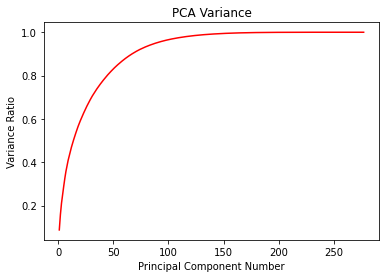

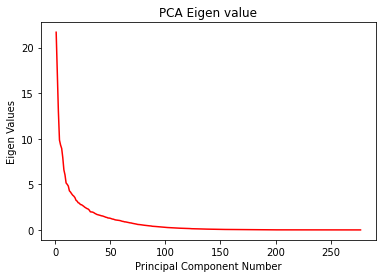

In [ ]:
# Implementation of PCA
pca_dict = {}
eigen_dict = {}
for n_comp in df_data.columns:
  pca = PCA(n_components=n_comp)
  temp_train_pca = pca.fit_transform(X_train)
  temp_test_pca = pca.transform(X_test)
  eigen_values = pca.explained_variance_[:n_comp]
  
  if n_comp > 0:
    #print (n_comp,pca.explained_variance_ratio_.sum(),eigen_values)[-1])
    pca_dict[n_comp] = pca.explained_variance_ratio_.sum()
    eigen_dict[n_comp] = eigen_values[-1]

f = plt.figure(1)
f.patch.set_facecolor('white')
plt.title('PCA Variance')
plt.xlabel('Principal Component Number')
plt.ylabel('Variance Ratio')
plt.plot(list(pca_dict.keys()),list(pca_dict.values()),'r')
f.show()

g = plt.figure(2)
g.patch.set_facecolor('white')
plt.title('PCA Eigen value')
plt.xlabel('Principal Component Number')
plt.ylabel('Eigen Values')
plt.plot(list(eigen_dict.keys()),list(eigen_dict.values()),'r')
g.show()

# Selecting components with Eigen value greater than 1 from the list
#pca_comp_eigen = max([key for key,val in eigen_dict.items() if val >= 1])
pca_comp_eigen = max([key for key,val in pca_dict.items() if val < 0.95])

print('Components from Feature selection using PCA (Having Eigen values >=1)- ' + str(pca_comp_eigen) + '\n')

# Performing PCA for the train data with the fixed components
pca = PCA(n_components=pca_comp_eigen)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print('Feature Selection using PCA complete for the train data.\n\n')

### Random Forest Classifier

This model works on a portion of training dataset by continuously sampling with replacement. Then fitting a decision tree to the model. Each decision tree is a sequence of yes-no questions based on a single or combination of features. All the features are not considered by the tree, which conirms that individual decision trees are not corelated. Hence the classifier less prone to overfitting.

The measure of impurity is by Gini index .


In [ ]:
# Implementation for Random forest
rfc = SelectFromModel(RandomForestClassifier(n_estimators = 20, random_state=0, n_jobs = -1))
rfc.fit(X_train, Y_train)

rfc_comp = X_train.columns[(rfc.get_support())]
print("Components from Feature Selection using Random Forest Classifier - ",len(rfc_comp))

# Transform the model to contain only the new data.
X_train_rfc= rfc.transform(X_train)
X_test_rfc = rfc.transform(X_test)
# Confirm that the transformed model has reduced components only
print(len(X_train_rfc[0]), len(X_test_rfc[0]))


Components from Feature Selection using Random Forest Classifier -  99
99 99


**SVM implementation using PCA**


### Support Vector Machines

Support Vector Machines(SVM) is a supervised machine learning algorithm used for classification, clustering and regression.

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible.New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

Below is the implementaion of SVM by tuning the model on hyperparameters:  
* Kernal type - linear, rbf, poly and sigmoid.
* Scale of regularization parameters - 10^-3, 10^-2, 10^-1, 10^0, 10^1, 10^2, 10^3.


### **SVM implementation using PCA** :
Below is the SVM model implementations of different types of SVM (linear, rbf and kernel) for classification of arrhythmia for the features selected by Principal Component Analysis (PCA). We will be comparing the accuracy scores of these SVM types to decide which one is better.

SVM Accuracies - PCA: 
Linear kernal has maximum accuracy - 0.7353 for critical factor 0.01

Radial Basis Function Kernel SVM accuracy - 0.6618 for critical factor 100

Polynomial Kernel SVM has maximum accuracy - 0.6838 for critical factor 1000

Sigmoid Kernel SVM has maximum accuracy - 0.6985 for critical factor 1




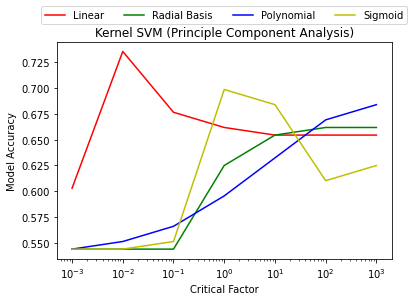

In [ ]:
# Hyperaeter tuning on regularization parameter and kernal for SVM
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
kernals = ['linear','rbf','poly','sigmoid']

pca_accuracy = {'linear':[], 'rbf':[], 'poly':[], 'sigmoid':[]}
#pca_f1_score = {'linear':[], 'rbf':[], 'poly':[], 'sigmoid':[]} 

for kernal in kernals:
  for cval in c_list:
    
    clf = SVC(max_iter=100000, kernel=kernal, C=cval)

    clf.fit(X_train_pca, Y_train)
    pca_accuracy[kernal].append(clf.score(X_test_pca, Y_test))
    yPred = clf.predict(X_test_pca)
    #pca_f1_score[kernal].append(f1_score(Y_test, yPred, average='weighted'))

    del clf
    del yPred

print('SVM Accuracies - PCA: ')
print('Linear kernal has maximum accuracy - '+ str(round(max(pca_accuracy['linear']),4)) + ' for critical factor ' + str(c_list[pca_accuracy['linear'].index(max(pca_accuracy['linear']))]) )
print('\nRadial Basis Function Kernel SVM accuracy - '+ str(round(max(pca_accuracy['rbf']),4)) + ' for critical factor ' + str(c_list[pca_accuracy['rbf'].index(max(pca_accuracy['rbf']))]) )
print('\nPolynomial Kernel SVM has maximum accuracy - ' + str(round(max(pca_accuracy['poly']),4)) + ' for critical factor ' + str(c_list[pca_accuracy['poly'].index(max(pca_accuracy['poly']))]))
print('\nSigmoid Kernel SVM has maximum accuracy - ' + str(round(max(pca_accuracy['sigmoid']),4)) + ' for critical factor ' + str(c_list[pca_accuracy['sigmoid'].index(max(pca_accuracy['sigmoid']))]) +'\n\n')

# Plot the Accuracy with C values
fig = plt.figure(1)
fig.patch.set_facecolor('white')
plt.xscale('log')
plt.title('Kernel SVM (Principle Component Analysis)')
plt.xlabel('Critical Factor')
plt.ylabel('Model Accuracy')
plt.plot(c_list, pca_accuracy['linear'], 'r', label = 'Linear')
plt.plot(c_list, pca_accuracy['rbf'], 'g', label = 'Radial Basis')
plt.plot(c_list, pca_accuracy['poly'], 'b', label = 'Polynomial')
plt.plot(c_list, pca_accuracy['sigmoid'], 'y', label = 'Sigmoid')
plt.legend(bbox_to_anchor = (0., 1.02, 1., .202), loc = 10, ncol=4, borderaxespad = 0)
fig.show()

####**SVM implementation using Random Forest Classifier**
Below is the SVM model implementations of different types of SVM (linear, rbf and kernel) for classification of arrhythmia for the features selected by Random Forests. We will be comparing the accuracy scores of these SVM types to decide which one is better.

SVM Accuracies - PCA: 
Linear kernal has maximum accuracy - 0.7353 for critical factor 0.01

Radial Basis Function Kernel SVM accuracy - 0.6618 for critical factor 100

Polynomial Kernel SVM has maximum accuracy - 0.6838 for critical factor 1000

Sigmoid Kernel SVM has maximum accuracy - 0.6985 for critical factor 1




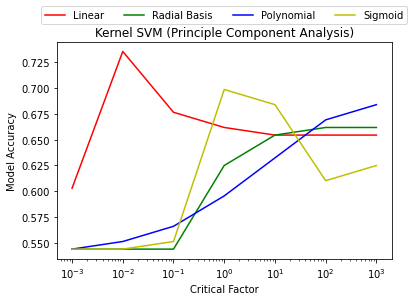

In [ ]:
# Hyperaeter tuning on regularization parameter and kernal for SVM
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
kernals = ['linear','rbf','poly','sigmoid']

pca_accuracy = {'linear':[], 'rbf':[], 'poly':[], 'sigmoid':[]}
#pca_f1_score = {'linear':[], 'rbf':[], 'poly':[], 'sigmoid':[]} 

for kernal in kernals:
  for cval in c_list:
    
    clf = SVC(max_iter=100000, kernel=kernal, C=cval)

    clf.fit(X_train_pca, Y_train)
    pca_accuracy[kernal].append(clf.score(X_test_pca, Y_test))
    yPred = clf.predict(X_test_pca)
    #pca_f1_score[kernal].append(f1_score(Y_test, yPred, average='weighted'))

    del clf
    del yPred

print('SVM Accuracies - PCA: ')
print('Linear kernal has maximum accuracy - '+ str(round(max(pca_accuracy['linear']),4)) + ' for critical factor ' + str(c_list[pca_accuracy['linear'].index(max(pca_accuracy['linear']))]) )
print('\nRadial Basis Function Kernel SVM accuracy - '+ str(round(max(pca_accuracy['rbf']),4)) + ' for critical factor ' + str(c_list[pca_accuracy['rbf'].index(max(pca_accuracy['rbf']))]) )
print('\nPolynomial Kernel SVM has maximum accuracy - ' + str(round(max(pca_accuracy['poly']),4)) + ' for critical factor ' + str(c_list[pca_accuracy['poly'].index(max(pca_accuracy['poly']))]))
print('\nSigmoid Kernel SVM has maximum accuracy - ' + str(round(max(pca_accuracy['sigmoid']),4)) + ' for critical factor ' + str(c_list[pca_accuracy['sigmoid'].index(max(pca_accuracy['sigmoid']))]) +'\n\n')

# Plot the Accuracy with C values
fig = plt.figure(1)
fig.patch.set_facecolor('white')
plt.xscale('log')
plt.title('Kernel SVM (Principle Component Analysis)')
plt.xlabel('Critical Factor')
plt.ylabel('Model Accuracy')
plt.plot(c_list, pca_accuracy['linear'], 'r', label = 'Linear')
plt.plot(c_list, pca_accuracy['rbf'], 'g', label = 'Radial Basis')
plt.plot(c_list, pca_accuracy['poly'], 'b', label = 'Polynomial')
plt.plot(c_list, pca_accuracy['sigmoid'], 'y', label = 'Sigmoid')
plt.legend(bbox_to_anchor = (0., 1.02, 1., .202), loc = 10, ncol=4, borderaxespad = 0)
fig.show()

### Best SVM model

Feature Selection - PCA and Random forest - equally good  
SVM Kernel - Linear SVM  
Regularization parameter - 10^-1

In [ ]:
#Assign the best values for the SVM parameter
clf = SVC(max_iter=100000, kernel='linear', C=0.01)

clf.fit(X_train_pca, Y_train)

yPred_svm = clf.predict(X_test_pca)

acc = accuracy_score(yPred_svm,Y_test)
print('Accuracy for SVM - Linear Kernal - ',round(acc,4))

result = classification_report(Y_test, yPred_svm)
print("\n",result)

Accuracy for SVM - Linear Kernal -  0.7353

               precision    recall  f1-score   support

           1       0.70      0.96      0.81        74
           2       0.75      0.69      0.72        13
           3       1.00      1.00      1.00         4
           4       0.60      0.75      0.67         4
           5       1.00      0.25      0.40         4
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       1.00      0.67      0.80         3
          10       1.00      0.67      0.80        15
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         7

    accuracy                           0.74       136
   macro avg       0.47      0.38      0.40       136
weighted avg       0.66      0.74      0.68       136



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
